# RED WINE QUALITY PREDICTION PROJECT 

In [1]:
# importing required basic libraries
import warnings
warnings.simplefilter("ignore")
import joblib

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore

In [3]:
# extracting data from github directly instead of downloading it into our machine.
rw_df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")

In [5]:
#reading the dataset
rw_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


This is the classification problem where we need consider quality as target variable and predict the quality of red wine.

## Exploratory Data Analysis

EDA is used to understand the features of dataset in detail 

In [7]:
# checking if the dataset consists of any mising values
rw_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

we can observe that the dataset doest not consists of any missing values.

In [8]:
# checking the Dtypes of each feature in the dataset
rw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


we can observe that all the columns with same dtype float and the target column as int

In [9]:
rw_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


we can observe the huge gap in columns residual sugar, free sulfur dioxide and total sulfar dioxide. so these might create the outlier problem for our model.

In [10]:
# checking the skewness of dataset
rw_df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

we can say that the outliers may be present in our dataset if the range of skew is range is +-0.5. so as per above data we can say that in fixed acidity, volatile acidity, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide,density, sulphates alcohol are outside the skew range. so these dataset may contain outlier which will be handled in the following stages if required.

# Data Visualization

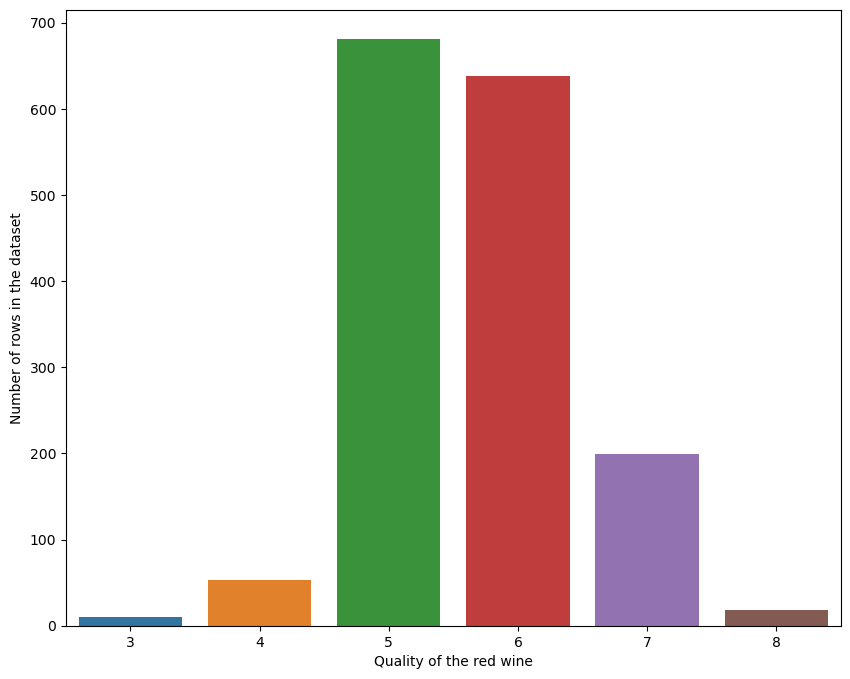

In [12]:
plt.figure(figsize=(10,8))
sns.countplot(x ='quality', data = rw_df)
plt.xlabel('Quality of the red wine')
plt.ylabel('Number of rows in the dataset')
plt.show()

with the couterplot we can say that our dataset consists of huge imbalance

In [15]:
#droping the target variable quality
index=0
labels = rw_df['quality']
features = rw_df.drop('quality', axis=1)

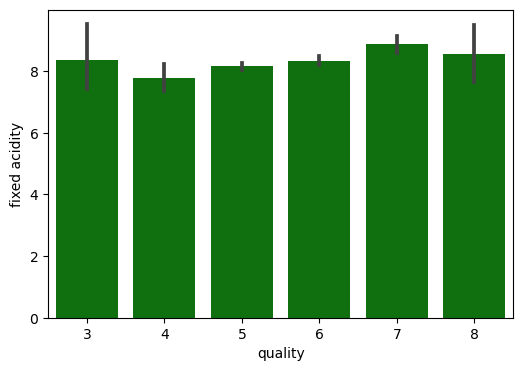

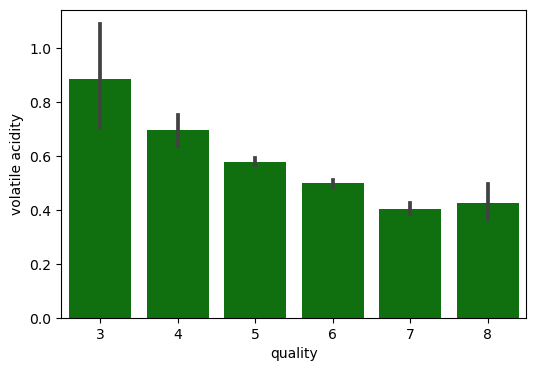

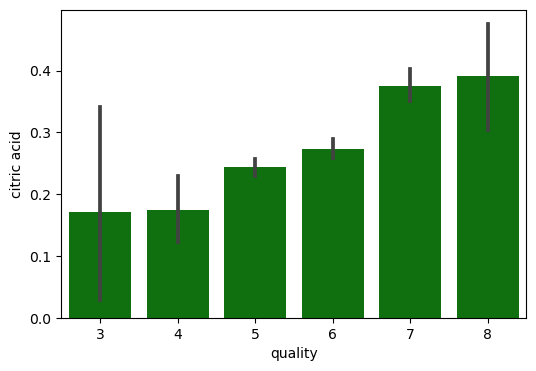

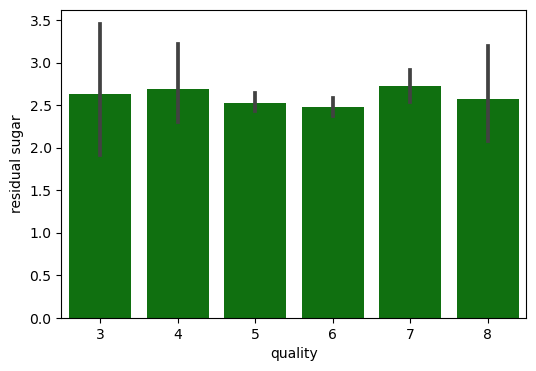

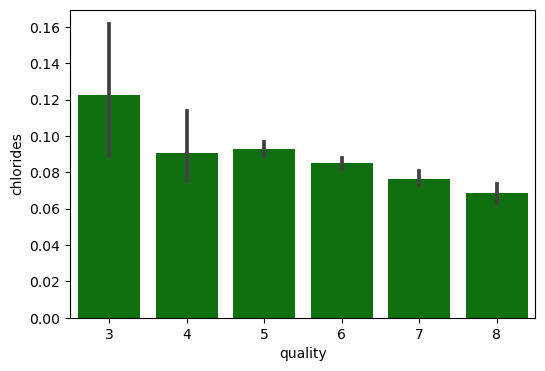

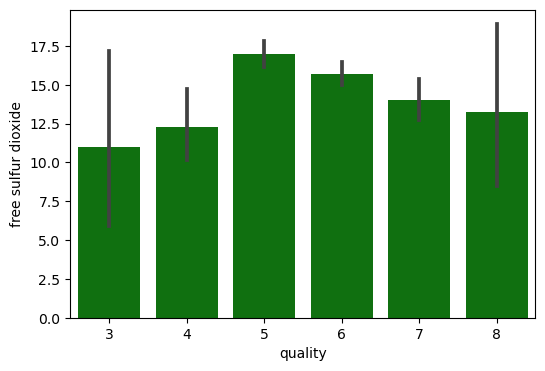

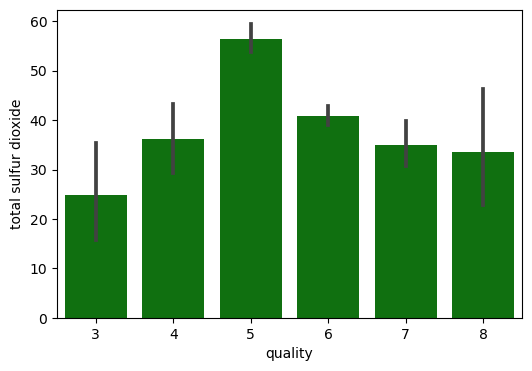

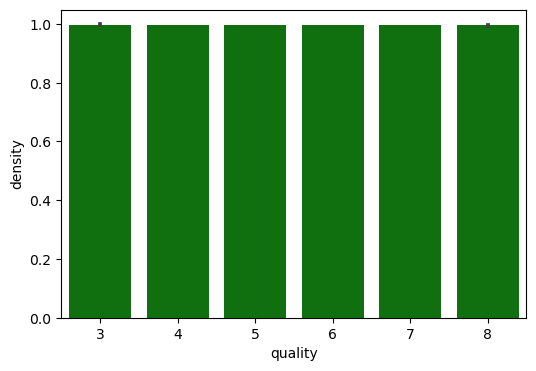

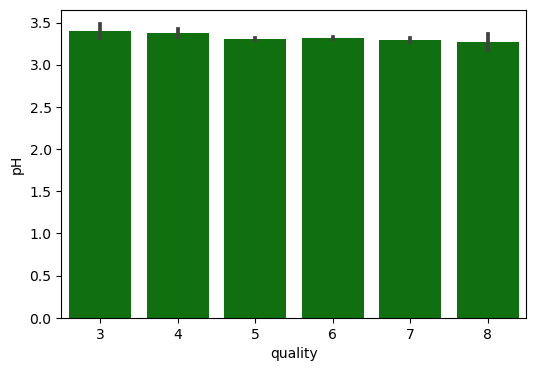

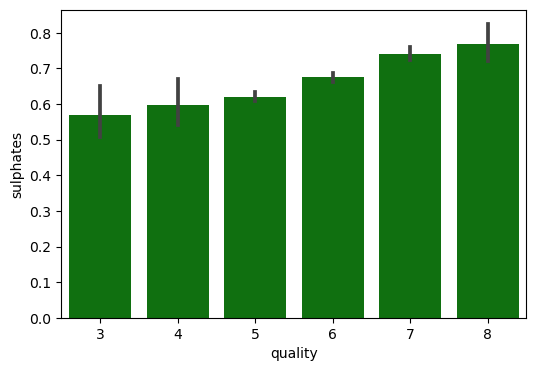

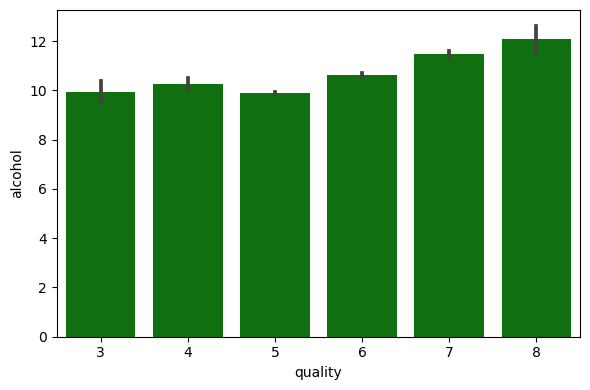

In [21]:
# barplot for each feature vs target variable
for col in features.items():
    plt.figure(figsize=(6,4))
    sns.barplot(x=labels, y=col[index], data=rw_df, color="green")
plt.tight_layout()
plt.show()

we can observe that for 1.fixed acidity vs quality : there is no fixed pattern 2. volatile acidity vs quality : there is decrease pattern 3.citric acid vs quality : there is increase trend 4.residual sugar vs quality :  irregular pattern 5. chlorides vs quanity : again there is decreasing pattern 6.free sugar dioxide vs quality : not fixed pattern increasing and then decreasing 7.total sufur dioxide vs quality: same as free sulfur dioxide increasing and decresing pattern is observed 8. density vs quality : all are equal not much to observe in pattern 9.ph vs quality : same as density no  certain pattern 10. sulphates vs quality : increase in pattern 11.alcohol vs quality : increase in pattern

we can observe increase pattern in ciitric acid , sulphates and alcohol so these are important for evaluation

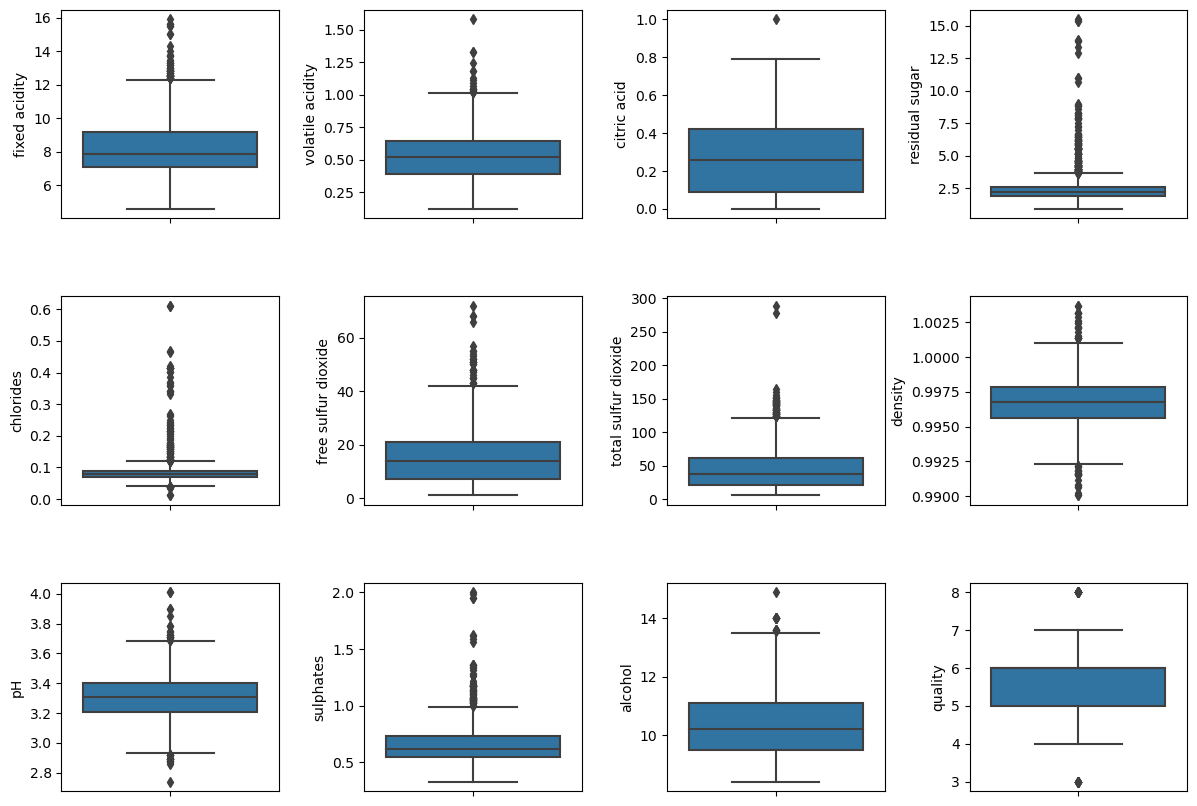

In [27]:
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(12,8))
index = 0
ax = ax.flatten()
for col, value in rw_df.items():
    sns.boxplot(y=col, data=rw_df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5.0)
plt.show()

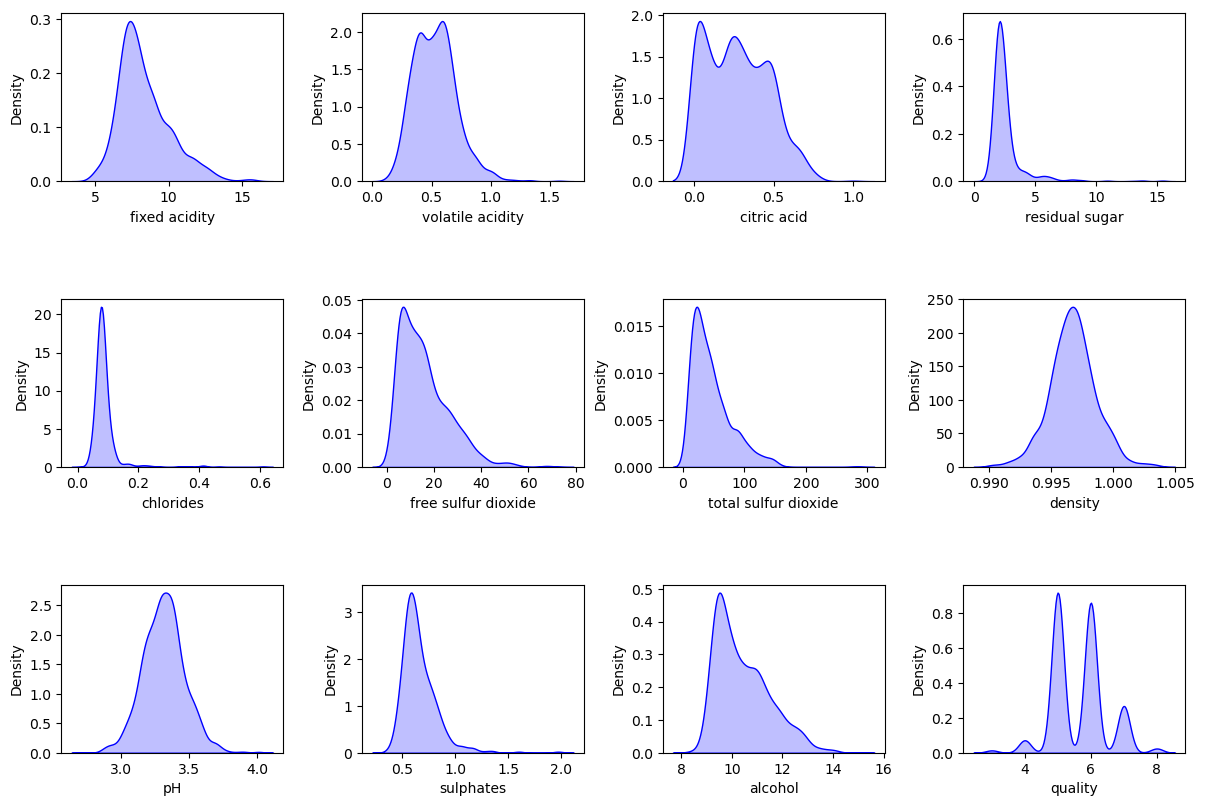

In [29]:
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(12,8))
index = 0
ax = ax.flatten()
for col, value in rw_df.items():
    sns.distplot(value, ax=ax[index], hist=False, color="b", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

we can observe only few columns with proper bell shape as good normal distribution

# Correlation Analysis

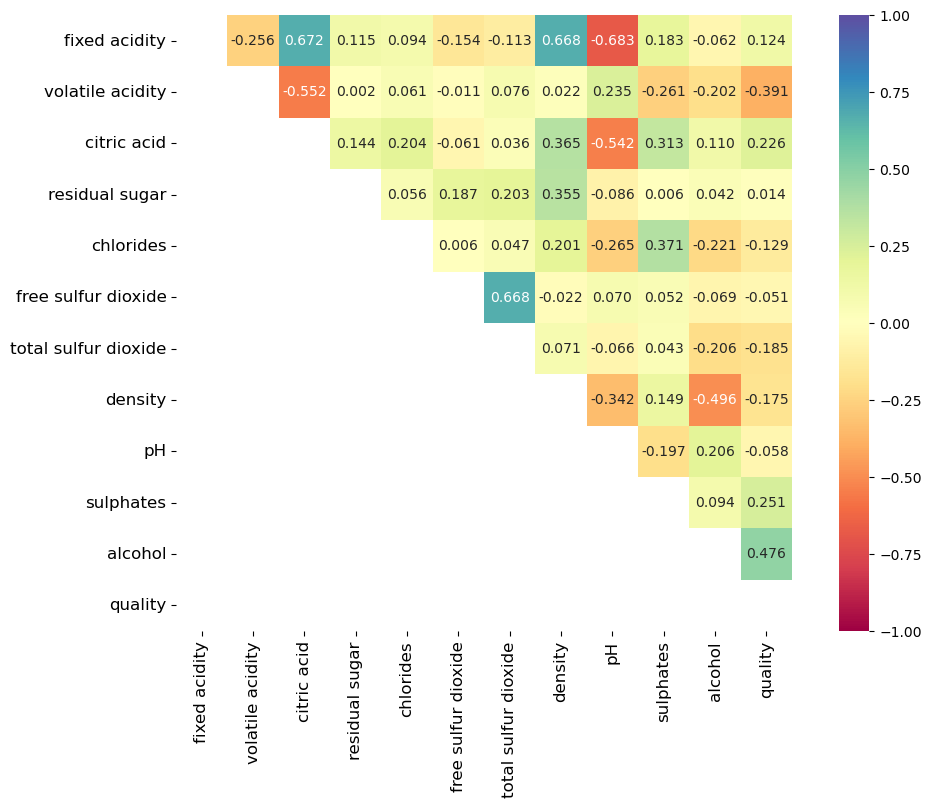

In [33]:
img = np.tril(rw_df.corr())
plt.figure(figsize=(12,8))
sns.heatmap(rw_df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="Spectral", mask=img)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


with the help of heatmap we can see multilinear collinearity which we have to handle in further steps if needed.

In [35]:
# dropping the columns
rw_df = rw_df.drop('free sulfur dioxide', axis=1)

In [36]:
rw_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


removed free sugar dioxide as it is similar to total sulfur dioxide column

In [39]:
# using z-score to remove skewness
z=np.abs(zscore(rw_df))
threshold=3
np.where(z>3)

rw_df=rw_df[(z<3).all(axis=1)]

In [40]:
rw_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


In [42]:
#train test split
x = rw_df.drop('quality', axis=1)
y = rw_df['quality']

In [44]:
# checking the quality for each count in qiuality column
y.value_counts()

5    624
6    590
7    187
4     47
8     16
Name: quality, dtype: int64

there are only 16 for 8 quality so imbalance can be observing. handling it using oversampling method

In [48]:
pip install imblearn

     -------------------------------------- 235.6/235.6 kB 4.9 MB/s eta 0:00:00
     -------------------------------------- 302.0/302.0 kB 9.4 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [54]:
from imblearn.over_sampling import SMOTE
imb_tech = SMOTE()
x, y = imb_tech.fit_resample(x, y)
y.value_counts()

5    624
6    624
7    624
4    624
8    624
Name: quality, dtype: int64

In [55]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.400000,0.700000,0.000000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000
1,7.800000,0.880000,0.000000,2.600000,0.098000,67.000000,0.996800,3.200000,0.680000,9.800000
2,7.800000,0.760000,0.040000,2.300000,0.092000,54.000000,0.997000,3.260000,0.650000,9.800000
3,11.200000,0.280000,0.560000,1.900000,0.075000,60.000000,0.998000,3.160000,0.580000,9.800000
4,7.400000,0.700000,0.000000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...,...
3115,11.226557,0.586951,0.652863,4.881747,0.084042,18.632784,0.998604,3.211432,0.685104,13.106228
3116,9.229461,0.341597,0.445969,2.221861,0.066219,14.739538,0.996696,3.183612,0.839069,10.579846
3117,9.335575,0.376731,0.415961,3.790379,0.070163,12.432691,0.996216,3.298077,0.746250,12.089422
3118,9.312465,0.329178,0.542493,2.508217,0.077374,16.708217,0.995881,3.167507,0.852890,11.933427


In [56]:
y

0       5
1       5
2       5
3       6
4       5
       ..
3115    8
3116    8
3117    8
3118    8
3119    8
Name: quality, Length: 3120, dtype: int64

In [57]:
# if the quality is greater than 7 then considered as bad wine
y = y.apply(lambda y_value:1 if y_value>=7 else 0) # 1 is for good quality and 0 for bad (not good) quality
y 

0       0
1       0
2       0
3       0
4       0
       ..
3115    1
3116    1
3117    1
3118    1
3119    1
Name: quality, Length: 3120, dtype: int64

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.668314,1.040967,-1.502672,-0.648298,-0.159806,-0.093164,0.822919,1.475868,-0.791415,-1.259246
1,-0.417017,2.049124,-1.502672,0.121487,1.055132,1.169319,0.210055,-0.770230,0.110157,-0.898720
2,-0.417017,1.377019,-1.297819,-0.208421,0.723785,0.671977,0.332627,-0.335501,-0.115236,-0.898720
3,1.719009,-1.311400,1.365260,-0.648298,-0.215030,0.901519,0.945492,-1.060049,-0.641153,-0.898720
4,-0.668314,1.040967,-1.502672,-0.648298,-0.159806,-0.093164,0.822919,1.475868,-0.791415,-1.259246
...,...,...,...,...,...,...,...,...,...,...
3115,1.735694,0.407792,1.840841,2.630709,0.284283,-0.681069,1.315755,-0.687402,0.148503,2.081237
3116,0.481032,-0.966403,0.781273,-0.294349,-0.699977,-0.830013,0.146203,-0.888967,1.305261,-0.195832
3117,0.547697,-0.769622,0.627594,1.430539,-0.482125,-0.918266,-0.148002,-0.059615,0.607899,1.164774
3118,0.533179,-1.035958,1.275601,0.020554,-0.083930,-0.754697,-0.353398,-1.005657,1.409096,1.024173


In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=21)

In [71]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [72]:
# defining the model used to call for different ml algorithms
def prediction(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    accu_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", accu_score)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = accu_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [73]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
prediction(model, x, y)

Accuracy Score: 90.22435897435898

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92       391
           1       0.86      0.88      0.87       233

    accuracy                           0.90       624
   macro avg       0.89      0.90      0.90       624
weighted avg       0.90      0.90      0.90       624

Cross Validation Score: 87.62820512820512

Accuracy Score - Cross Validation Score is 2.596153846153854


In [75]:
# Support Vector Classifier
from sklearn.svm import SVC
model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
prediction(model, x, y)

Accuracy Score: 92.94871794871796

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       391
           1       0.89      0.93      0.91       233

    accuracy                           0.93       624
   macro avg       0.92      0.93      0.93       624
weighted avg       0.93      0.93      0.93       624

Cross Validation Score: 89.96794871794872

Accuracy Score - Cross Validation Score is 2.9807692307692406


In [77]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=21, max_depth=15)
prediction(model, x, y)

Accuracy Score: 92.46794871794873

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       391
           1       0.90      0.90      0.90       233

    accuracy                           0.92       624
   macro avg       0.92      0.92      0.92       624
weighted avg       0.92      0.92      0.92       624

Cross Validation Score: 89.23076923076924

Accuracy Score - Cross Validation Score is 3.237179487179489


In [79]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(max_depth=15, random_state=111)
prediction(model, x, y)

Accuracy Score: 94.87179487179486

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       391
           1       0.92      0.94      0.93       233

    accuracy                           0.95       624
   macro avg       0.94      0.95      0.95       624
weighted avg       0.95      0.95      0.95       624

Cross Validation Score: 92.01923076923076

Accuracy Score - Cross Validation Score is 2.852564102564102


In [81]:
# K Neighbors Classifier
from sklearn.ensemble import ExtraTreesClassifier
model=KNeighborsClassifier(n_neighbors=15)
prediction(model, x, y)

Accuracy Score: 91.98717948717949

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.93       391
           1       0.85      0.95      0.90       233

    accuracy                           0.92       624
   macro avg       0.91      0.93      0.92       624
weighted avg       0.92      0.92      0.92       624

Cross Validation Score: 87.75641025641025

Accuracy Score - Cross Validation Score is 4.230769230769241


In [83]:
from sklearn.neighbors import KNeighborsClassifier
# Extra Trees Classifier
model=ExtraTreesClassifier()
prediction(model, x, y)

Accuracy Score: 95.99358974358975

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       391
           1       0.94      0.96      0.95       233

    accuracy                           0.96       624
   macro avg       0.96      0.96      0.96       624
weighted avg       0.96      0.96      0.96       624

Cross Validation Score: 93.17307692307692

Accuracy Score - Cross Validation Score is 2.820512820512832


In [91]:
pip install xgboost

     --------------------------------------- 70.9/70.9 MB 21.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [92]:
import xgboost as xgb
model=xgb.XGBClassifier(verbosity=0)
prediction(model, x, y)

Accuracy Score: 95.83333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       391
           1       0.94      0.95      0.94       233

    accuracy                           0.96       624
   macro avg       0.95      0.96      0.96       624
weighted avg       0.96      0.96      0.96       624

Cross Validation Score: 92.46794871794873

Accuracy Score - Cross Validation Score is 3.365384615384613


In [88]:
pip install lightgbm

     ---------------------------------------- 1.3/1.3 MB 14.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [89]:
import lightgbm as lgb
model=lgb.LGBMClassifier()
prediction(model, x, y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1015, number of negative: 1481
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000567 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2549
[LightGBM] [Info] Number of data points in the train set: 2496, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.406651 -> initscore=-0.377829
[LightGBM] [Info] Start training from score -0.377829
Accuracy Score: 95.1923076923077

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       391
           1       0.92      0.95      0.94       233

    accuracy                           0.95       624
   macro avg       0.95      0.95      0.95       624
weighted avg       0.95      0.95      0.95       624

[LightGBM] [Warning] Found whitespace in 

# Hyper parameter Tuning

In [93]:
svc_param = {'kernel' : ['poly', 'sigmoid', 'rbf'],
             'gamma' : ['scale', 'auto'],
             'shrinking' : [True, False],
             'random_state' : [21,42,104],
             'probability' : [True, False],
             'decision_function_shape' : ['ovo', 'ovr'],
             'verbose' : [True, False]}

In [95]:
from sklearn.model_selection import GridSearchCV 
GSCV = GridSearchCV(SVC(), svc_param, cv=5)

In [96]:
GSCV.fit(X_train,Y_train)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'sigmoid', 'rbf'],
                         'probability': [True, False],
                         'random_state': [21, 42, 104],
                         'shrinking': [True, False], 'verbose': [True, False]})

In [97]:
GSCV.best_params_

{'decision_function_shape': 'ovo',
 'gamma': 'auto',
 'kernel': 'rbf',
 'probability': True,
 'random_state': 21,
 'shrinking': True,
 'verbose': True}

In [98]:
best_model = SVC(decision_function_shape='ovo', gamma='scale', kernel='rbf', probability=True, random_state=21,
                 shrinking=True, verbose=True)
Classifier = best_model.fit(X_train, Y_train)
fmod_pred = best_model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

[LibSVM]Accuracy score for the Best Model is: 92.94871794871796


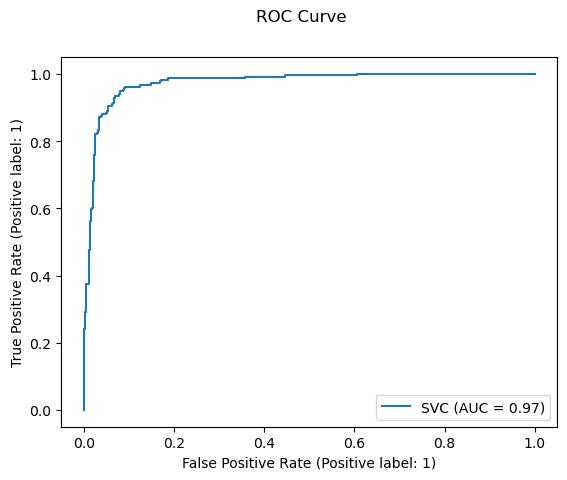

In [99]:
display_auc = metrics.plot_roc_curve(best_model, X_test, Y_test)
display_auc.figure_.suptitle("ROC Curve")
plt.show()

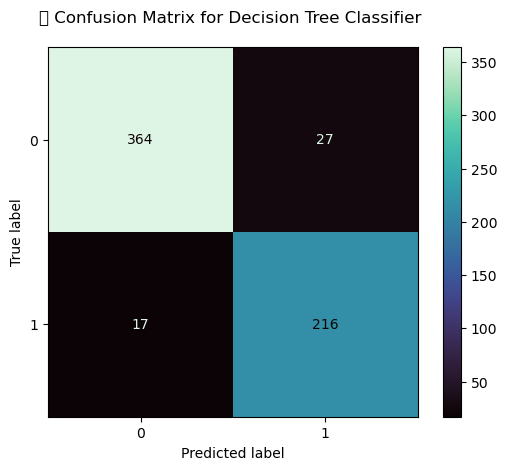

In [101]:
#confussion matrix
con_mat = rw_df.columns
metrics.plot_confusion_matrix(Classifier, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for Decision Tree Classifier \n')
plt.show()

In [102]:
#saving the model
filename = "redwine_prediction.pkl"
joblib.dump(best_model, filename)

['redwine_prediction.pkl']